In [12]:
2+2

4

In [1]:
import datetime
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from ipywidgets import widgets

In [2]:
df = pd.read_csv('data/nycflights.csv')
df = df.drop(df.columns[[0]], axis=1)
df.sample(3)

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
298074  2013      8   20     623.0       -7.0     811.0      -27.0      US   
321635  2013      9   14    1537.0       -6.0    1718.0      -27.0      US   
315340  2013      9    7    1958.0       -1.0    2236.0      -27.0      UA   

       tailnum  flight origin dest  air_time  distance  hour  minute  
298074  N540UW    2085    LGA  CLT      85.0       544   6.0    23.0  
321635  N757UW    2088    LGA  CLT      75.0       544  15.0    37.0  
315340  N47414    1730    EWR  FLL     139.0      1065  19.0    58.0

In [3]:
log = widgets.Dropdown(
    options=["log", "lineal"],
    value='lineal',
    description='Escala: ',
)


# Assign an empty figure widget with two traces
trace1 = go.Histogram(x=df['arr_delay'], opacity=0.75, name='Arrival Delays')
trace2 = go.Histogram(x=df['dep_delay'], opacity=0.75, name='Departure Delays')
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(text='NYC FlightDatabase'), barmode='overlay',
                    ))

In [4]:
def escala(change):
    with g.batch_update():
        if log.value == "log":
            g.layout.yaxis.type = 'log'
        else:
            g.layout.yaxis.type = 'linear'
            
log.observe(escala, names="value")

In [5]:
container2 = widgets.HBox([log])
widgets.VBox([container2,g])

## Ejemplo para compartir y consultar

In [21]:
x = np.array(list(range(1000)))
y1 = x**2
y2 = x**4

In [22]:
log = widgets.Dropdown(
    options=["log", "lineal"],
    value='lineal',
    description='Escala: ',
)

trace1 = go.Scatter(x=x, y=y1, opacity=0.75, name='y1')
trace2 = go.Scatter(x=x, y=y2, opacity=0.75, name='y2')
g = go.FigureWidget(data=[trace1, trace2])

In [23]:
def escala(change):
    with g.batch_update():
        if log.value == "log":
            g.layout.yaxis.type = 'log'
        else:
            g.layout.yaxis.type = 'linear'
            
log.observe(escala, names="value")

In [24]:
container2 = widgets.HBox([log])
widgets.VBox([container2,g])

In [26]:
g.write_html("test.html", include_plotlyjs="cdn")?

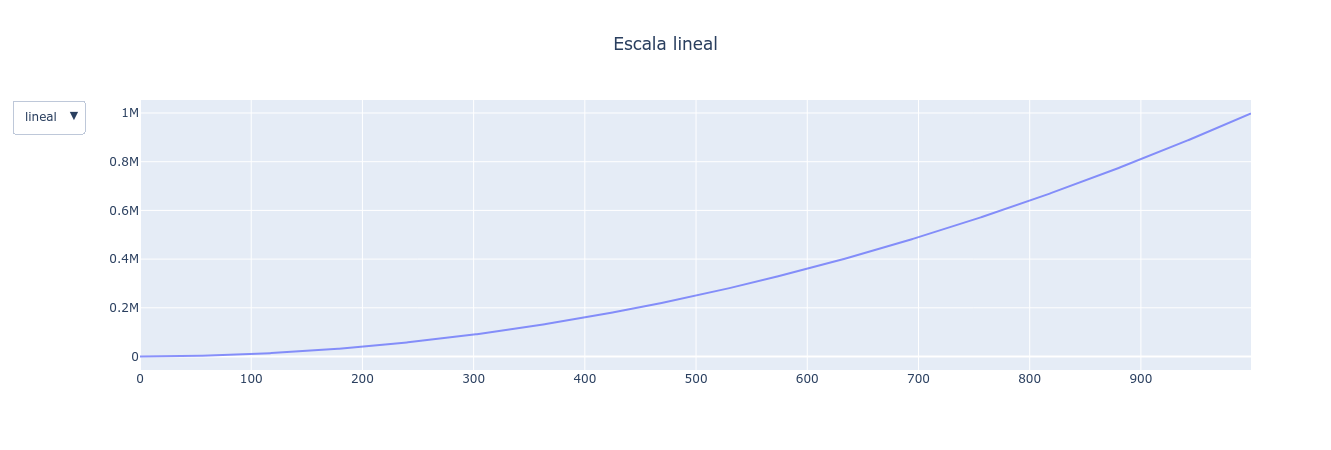

In [3]:
import numpy as np
import plotly.graph_objects as go

x = np.arange(1000)
y1 = x**2

trace1 = go.Scatter(x=x, y=y1, opacity=0.75, name='y1', visible=True)
trace2 = go.Scatter(x=x, y=y1, opacity=0.75, name='y1', visible=False)
data = [trace1, trace2]

updatemenus = list([
    dict(active=1,
         buttons=list([
            dict(label='log',
                 method='update',
                 args=[{'visible': [True, False]},
                       {'title': 'Escala log',
                        'yaxis': {'type': 'log'}}]),
            dict(label='lineal',
                 method='update',
                 args=[{'visible': [False, True]},
                       {'title': 'Escala lineal',
                        'yaxis': {'type': 'linear'}}])
            ]),
        )
    ])

layout = dict(updatemenus=updatemenus,
              title='Escala lineal',
              title_x=0.5)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [4]:
fig.write_html("output_buttons.html", include_plotlyjs="cdn")

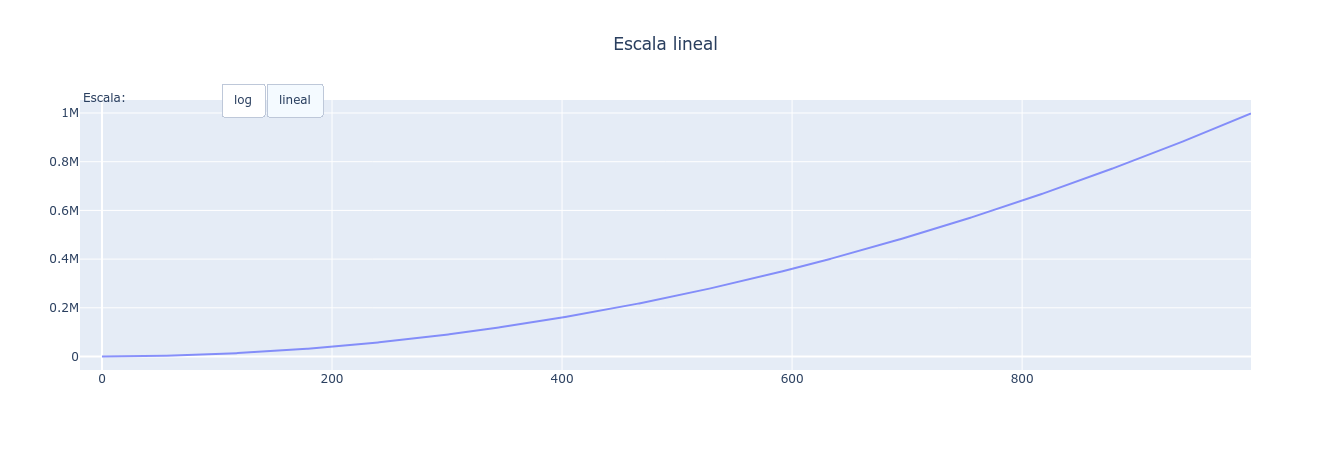

In [1]:
# in this case you should play with buttons and annotation position
# What shown in jupyter may differ from the html

import numpy as np
import plotly.graph_objects as go

x = np.arange(1000)
y1 = x**2

trace1 = go.Scatter(x=x, y=y1, opacity=0.75, name='y1', visible=True)
trace2 = go.Scatter(x=x, y=y1, opacity=0.75, name='y1', visible=False)
data = [trace1, trace2]

updatemenus = list([
    dict(active=1,
         type = "buttons",
         direction = "left",
         buttons=list([
            dict(label='log',
                 method='update',
                 args=[{'visible': [True, False]},
                       {'title': 'Escala log',
                        'yaxis': {'type': 'log'}}]),
            dict(label='lineal',
                 method='update',
                 args=[{'visible': [False, True]},
                       {'title': 'Escala lineal',
                        'yaxis': {'type': 'linear'}}])
            ]),
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.12,
            xanchor="left",
            y=1.10,
            yanchor="top"
        )
    ])

layout = dict(updatemenus=updatemenus,
              title='Escala lineal',
              title_x=0.5)
fig = go.Figure(data=data, layout=layout)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Escala:", showarrow=False,
                             x=0, y=1.05, yref="paper", align="left")
    ]
)
fig.show()